# Tutorial 5:

## Random Forest Regression
Random Forests Regression is an ensemble learning method that combines multiple Decision Tree Regressions. The method uses a multitude of decision trees to train and predict values. Random Forests reduces the over-fitting in comparison to using a single Decision Tree model.
For a deeper understanding of Random Forest Regression, use the following resources:
- ***Random Forests***
- ***Understanding Random Forests***
  
 In this section, we will learn some of the key concepts in Random Forest. Inside, the practice segment you will also learn to develop a Random Forest model for Regression Problems.
 ![Random_forest](images/Random_forest.png "Random_forest")
   
---------------------------------------------
#### The following concepts are key to understand the Random Forest Algorithm,
- **Bagging**
- **Ensemble Learning**

#### Bagging
Bagging is a paradigm to use weak learners to create a strong learner. Using bagging multiple decision tree learners are used on sub-sampled sets of data and the results from each is aggregated based on the nature of the problem statement.

For classification, the results from every learner are used and a majority consensus is used whereas for regression the results are averaged across multiple decision trees.

Random Forests are also used for Feature selection, as every tree has a root node. It’s easy for an ensemble model such as Random Forest to find the most relevant features.

#### Ensemble Learning
Ensembling or Ensemble learning is a technique to combine multiple models to generate a more robust model. It is used to develop algorithms such as Random Fores, Gradient Boosting, XgBoost.

## In this practice session, we will learn to code Random Forest Regression. 
### We will perform the following steps to build a simple classifier using the popular Iris dataset.

 
 
  - **Data Preprocessing**

    - Importing the libraries.
    - Dealing with the categorical variable.
    - Classifying dependent and independent variables.
    - Splitting the data into a training set and test set.
    - Feature scaling.
 

  -  **Random Forest Regression**

    - Create a Random Forest Regressor.
    - Feed the training data to the regression model.
    - Predicting the species for the test set.
    - Using the RMSE to calculate the error metric.

In [1]:
import ipywidgets as widgets
from IPython.display import display

style = {'description_width': 'initial'}

In [2]:
#1 Importing essential libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
#2 Importing the dataset

file_name = 'DataSets/beer_data.csv'
dataset = pd.read_csv(file_name)

In [5]:
#Displaying the dataset
dataset.head(8)

,beer_beerid,review_profilename,review_overall
0,48215,stcules,3.0
1,52159,oline73,3.0
2,52159,alpinebryant,3.0
3,52159,rawthar,4.0
4,52159,RangerClegg,3.5
5,58046,mikedrinksbeer2,4.5
6,58046,dbmernin83,4.0
7,58046,Blakaeris,4.5


In [6]:
# Dealing with Categorical variables
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#Making sure the type of the review_profilename column is str
dataset["review_profilename"] = dataset["review_profilename"].astype(str)
dataset["review_profilename"] = le.fit_transform(dataset["review_profilename"])
dataset.head()

,beer_beerid,review_profilename,review_overall
0,48215,20635,3.0
1,52159,18354,3.0
2,52159,9525,3.0
3,52159,19171,4.0
4,52159,6912,3.5


In [7]:
print(f"Dataset has {dataset.shape[0]} rows and {dataset.shape[1]} columns.")

Dataset has 475984 rows and 3 columns.


In [9]:
# classify dependent and independent variables
X = dataset[[col for col in dataset.columns if col not in ('review_overall')]].values  #independent variables 
y = dataset['review_overall'].values  #dependent variable 

In [12]:
print("\nIdependent Variables :\n\n", X[:5])
print("\nDependent Variable (Score):\n\n", y[:5])


Idependent Variables :

 [[48215 20635]
 [52159 18354]
 [52159  9525]
 [52159 19171]
 [52159  6912]]

Dependent Variable (Score):

 [3.  3.  3.  4.  3.5]


## Create Train and Test Sets

In [13]:
#4 Creating training set and testing set
from sklearn.model_selection import train_test_split
test_size = widgets.FloatSlider(min=0.01, max=0.6, value=0.2, description="Test Size :", tooltips=['Usually 20-30%'])
display(test_size)

FloatSlider(value=0.2, description='Test Size :', max=0.6, min=0.01)

In [14]:
#Divide the dataset into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X ,y, test_size=test_size.value, random_state = 0) 

In [15]:
print("Training Set :\n----------------\n")
print("X = \n", X_train[:5])
print("y = \n", y_train[:5])

print("\n\nTest Set :\n----------------\n")
print("X = \n",X_test[:5])
print("y = \n", y_test[:5])

Training Set :
----------------

X = 
 [[ 2512  8970]
 [60420 13289]
 [ 1443 19400]
 [  836  5998]
 [12104 15292]]
y = 
 [4.5 3.5 4.5 4.  4. ]


Test Set :
----------------

X = 
 [[ 9873  7180]
 [42466 16724]
 [ 1119  4712]
 [38919 10641]
 [34832 17880]]
y = 
 [3.  3.5 2.5 2.5 5. ]


In [16]:
print(f"Shape of Training set is {X_train.shape}")
print(f"Shape of Testing set is {X_test.shape}")

Shape of Training set is (380787, 2)
Shape of Testing set is (95197, 2)


### Apply Random Forest Regression

In [17]:
# import random forest library
from sklearn.ensemble import RandomForestRegressor

# configure params for the model.
max_feat_wig = widgets.ToggleButtons(options=['log2', 'sqrt', 'auto'],
                                    description='Number of features for the best split :',
                                    disabled=False,
                                    style=style)

display(max_feat_wig)

max_depth_wig = widgets.Dropdown(options=[10, 20, 30, 50],
                            description='The maximum depth of the Tree. :',
                            style=style)

display(max_depth_wig)

min_split_wig = widgets.Dropdown(options=[100, 200, 300, 500],
                            description='Minimum Number of Splits. :',
                            style=style)

display(min_split_wig)

njobs_wig = widgets.Dropdown(options=[('One', 1), ('Two', 2), ('Three', 3), ('All Cores', -1)], 
                             description="Number of CPU Cores :", style=style)

display(njobs_wig)

ToggleButtons(description='Number of features for the best split :', options=('log2', 'sqrt', 'auto'), style=T…

Dropdown(description='The maximum depth of the Tree. :', options=(10, 20, 30, 50), style=DescriptionStyle(desc…

Dropdown(description='Minimum Number of Splits. :', options=(100, 200, 300, 500), style=DescriptionStyle(descr…

Dropdown(description='Number of CPU Cores :', options=(('One', 1), ('Two', 2), ('Three', 3), ('All Cores', -1)…

### Predict and Evaluate the Model

In [18]:
# Train the Regressor with training set
regressor = RandomForestRegressor(max_features=max_feat_wig.value,
                                  max_depth=max_depth_wig.value,
                                  min_samples_split=min_split_wig.value,
                                  n_jobs=njobs_wig.value)

#fit the linear model
regressor.fit(X_train, y_train)

#7 predict the outcome of test sets
y_Pred = regressor.predict(X_test)
print("\nPredictions = ", y_Pred)


Predictions =  [3.80814238 3.82439435 3.8830482  ... 4.02846789 3.82526207 3.60236408]


In [19]:
# Calculating score from Root Mean Log Squared Error
def rmlse(y_test, y_pred):
    error = np.square(np.log10(y_pred +1) - np.log10(y_test +1)).mean() ** 0.5
    score = 1 - error
    return score

# Printing the score
print("\n----------------------------\nRMLSE Score = ", rmlse(y_test, y_Pred))

#9 Comparing Actual and Predicted Salaries for he test set
print("\nActual vs Predicted Scores \n------------------------------\n")
error_df = pd.DataFrame({"Actual" : y_test,
                         "Predicted" : y_Pred,
                         "Abs. Error" : np.abs(y_test - y_Pred)})

error_df


----------------------------
RMLSE Score =  0.9269142381303791

Actual vs Predicted Scores 
------------------------------



,Actual,Predicted,Abs. Error
0,3.0,3.808142,0.808142
1,3.5,3.824394,0.324394
2,2.5,3.883048,1.383048
3,2.5,3.808042,1.308042
4,5.0,3.823904,1.176096
...,...,...,...
95192,3.0,3.759466,0.759466
95193,3.5,3.752251,0.252251
95194,4.0,4.028468,0.028468
95195,5.0,3.825262,1.174738


## Feature Importance

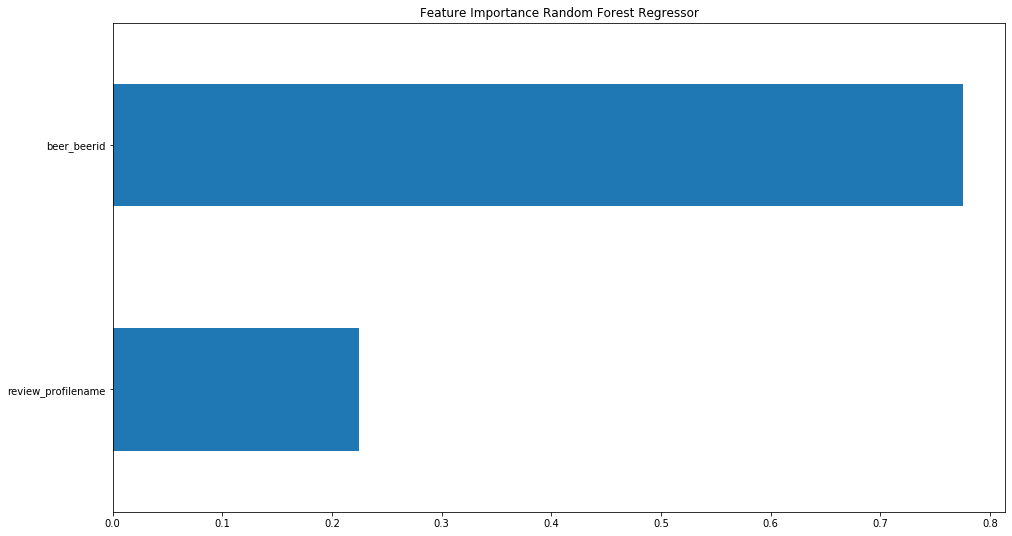

In [21]:
feat_names = [col for col in dataset.columns if col not in ('review_overall')]

pd.Series(regressor.feature_importances_, \
          index=feat_names).sort_values(ascending=True).plot(kind='barh', figsize=(16,9));

plt.title('Feature Importance Random Forest Regressor');

## Actual vs. Predicted

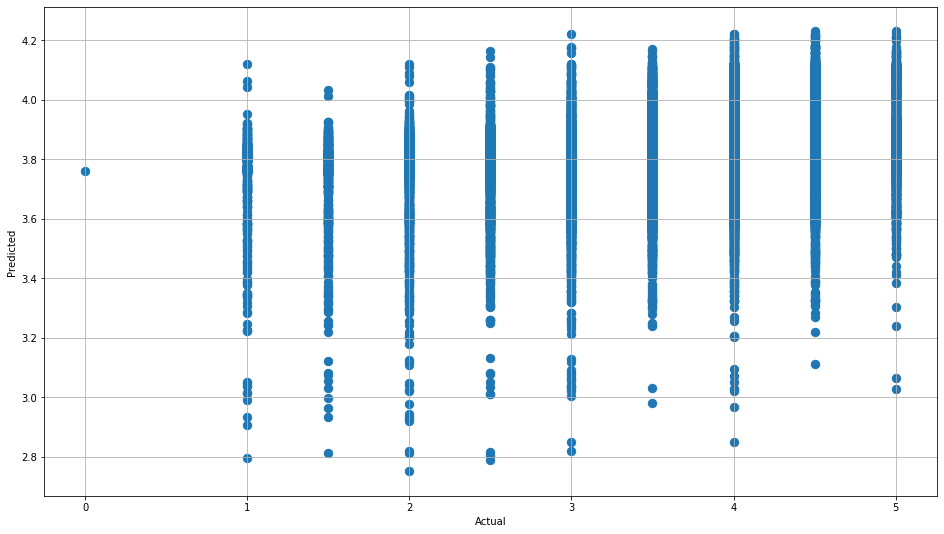

In [22]:
#Plotting Actual observation vs Predictions
plt.figure(figsize=(16, 9));
plt.scatter(y_test, y_Pred, s = 70)
plt.xlabel('Actual');
plt.ylabel('Predicted');
plt.grid();
plt.show();